# fly h1 vary speeds

In [24]:
using PyPlot
using PyCall
using Printf
using Statistics
include("spike_utils.jl")

pyabf = pyimport("pyabf");
sns = pyimport("seaborn");
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["figure.figsize"] = (16,10)
sns.set_context("talk")

In [2]:
filepath = "data/19o09014-fly2-csf-cont-ccw-varyspeeds-2so.abf"
spk, stim, t, srate, pts_per_ms = load_fly_data(filepath);

THRESHOLD = -2.5 * std(spk)
SPK_WIN_MS = 6
spkidx = get_thresholded_spikes(spk, THRESHOLD, SPK_WIN_MS * pts_per_ms)
wfs, tspk = collect_waveforms(spk, spkidx, SPK_WIN_MS, pts_per_ms)
feats = compute_wf_features(wfs, tspk);

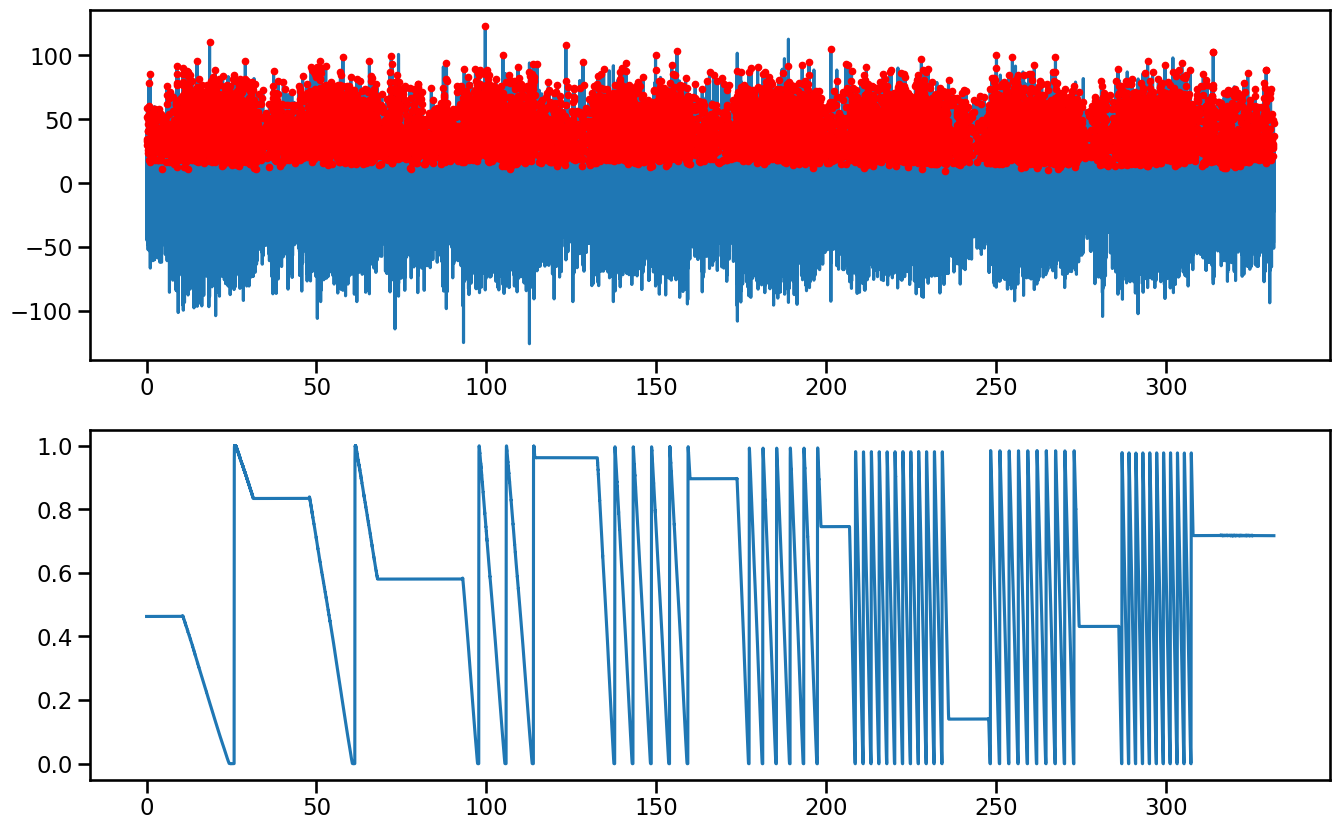

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1206b8dd0>

In [3]:
subplot(2,1,1)
plot(t, spk)
plot(t[spkidx], feats["peak"], "r.")
subplot(2,1,2)
plot(t, stim)

In [4]:
r = Dict()
r[1] = [105500, 315000]
r[2] = [479000, 680000]
r[3] = [930000, 1145000]
r[4] = [1325000, 1605000]
r[5] = [1736000, 1988000]
r[6] = [2068000, 2365000]
r[7] = [2478000, 2750000]
r[8] = [2860000, 3100000];

In [5]:
s = Dict()
s["trl"] = Dict()
for i = 1 : length(r)
    s["trl"][i] = Dict()
    s["trl"][i]["lims"]    = r[i]
    s["trl"][i]["spk"]     = spk[r[i][1] : r[i][2]]
    s["trl"][i]["stim"]    = stim[r[i][1] : r[i][2]]
    s["trl"][i]["t"]       = t[r[i][1] : r[i][2]]
    itrial_spkidx   = findall(s_i -> s_i > r[i][1] && s_i < r[i][2], spkidx)
    s["trl"][i]["spkidx"]  = spkidx[itrial_spkidx] .- r[i][1]
    s["trl"][i]["wfs"]     = wfs[itrial_spkidx, :]
    s["trl"][i]["peak"]    = feats["peak"][itrial_spkidx]
    s["trl"][i]["trough"]  = feats["trough"][itrial_spkidx]
    s["trl"][i]["spkauc"]  = feats["spkauc"][itrial_spkidx]
    s["trl"][i]["pt_dist"] = feats["pt_dist"][itrial_spkidx]
    s["trl"][i]["absuac"]  = feats["absauc"][itrial_spkidx]
end

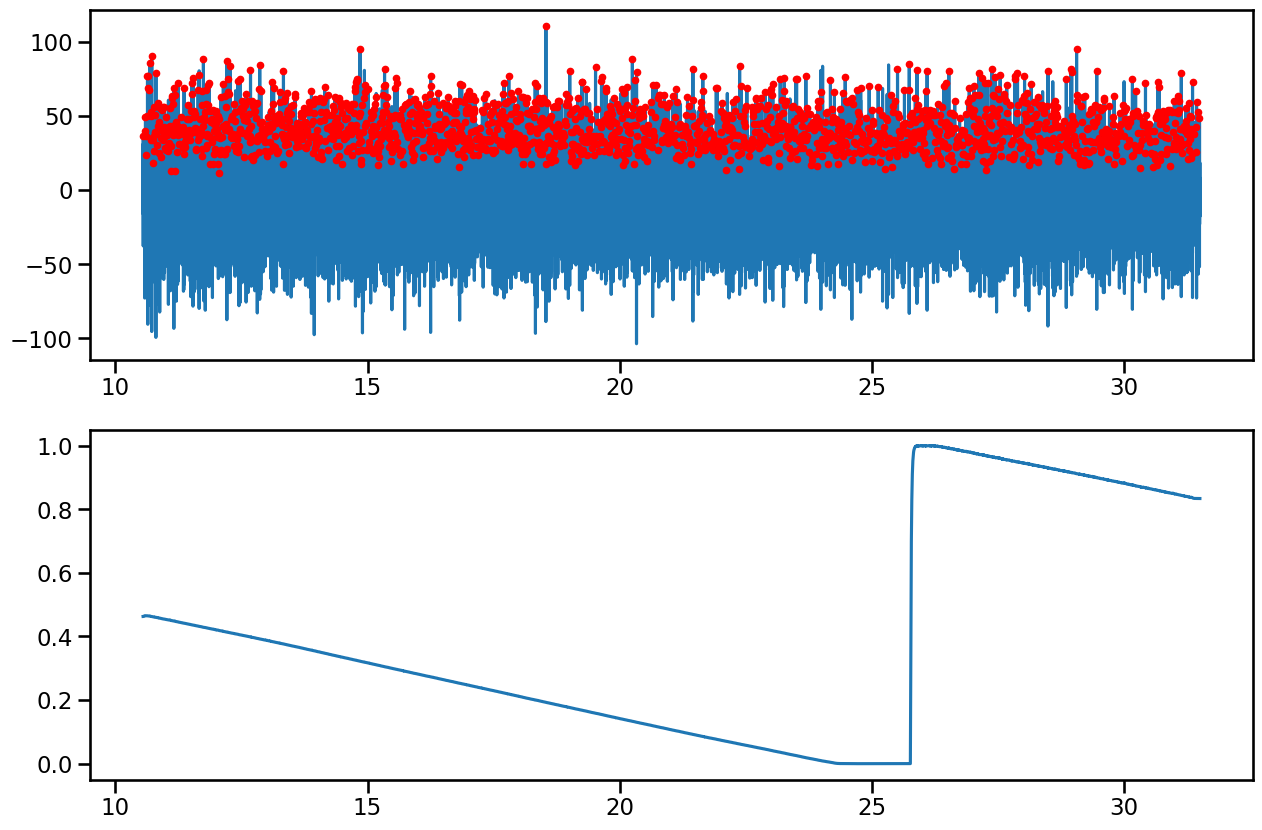

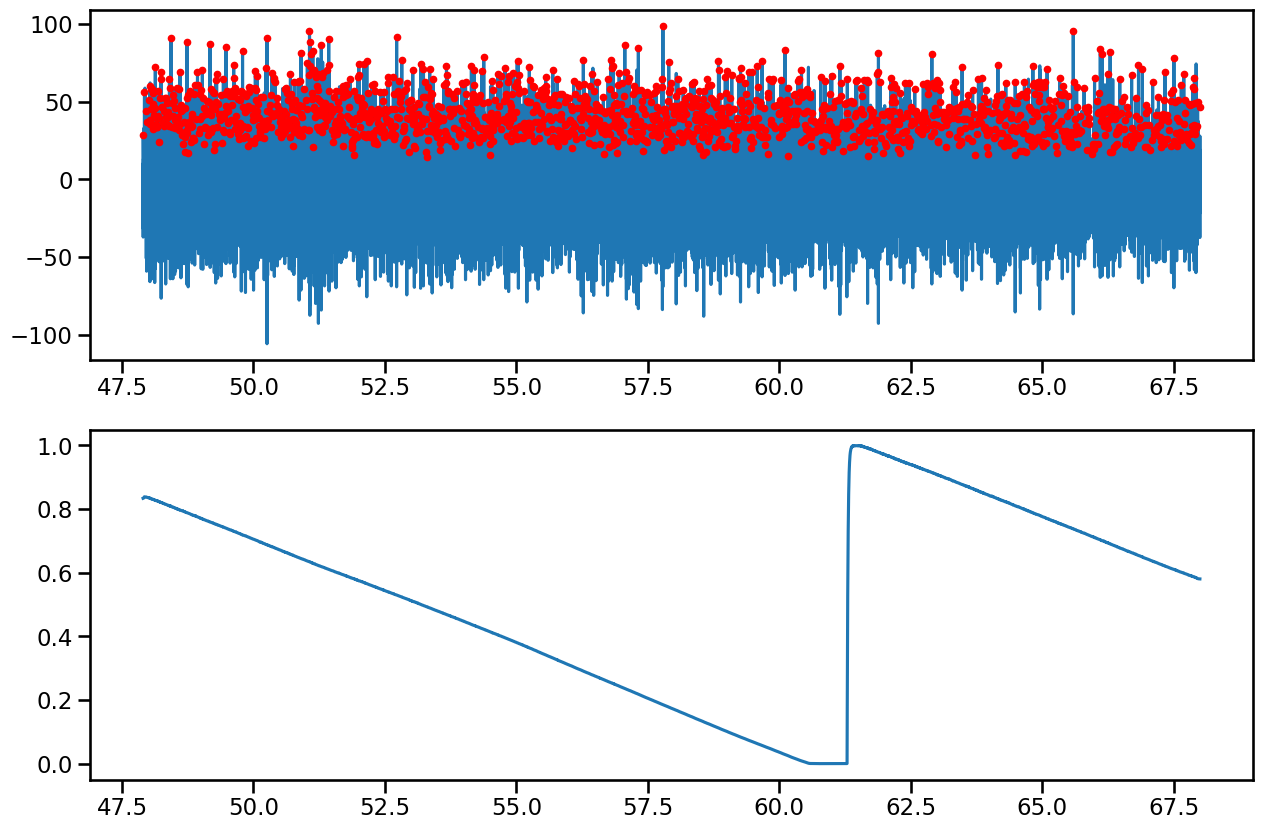

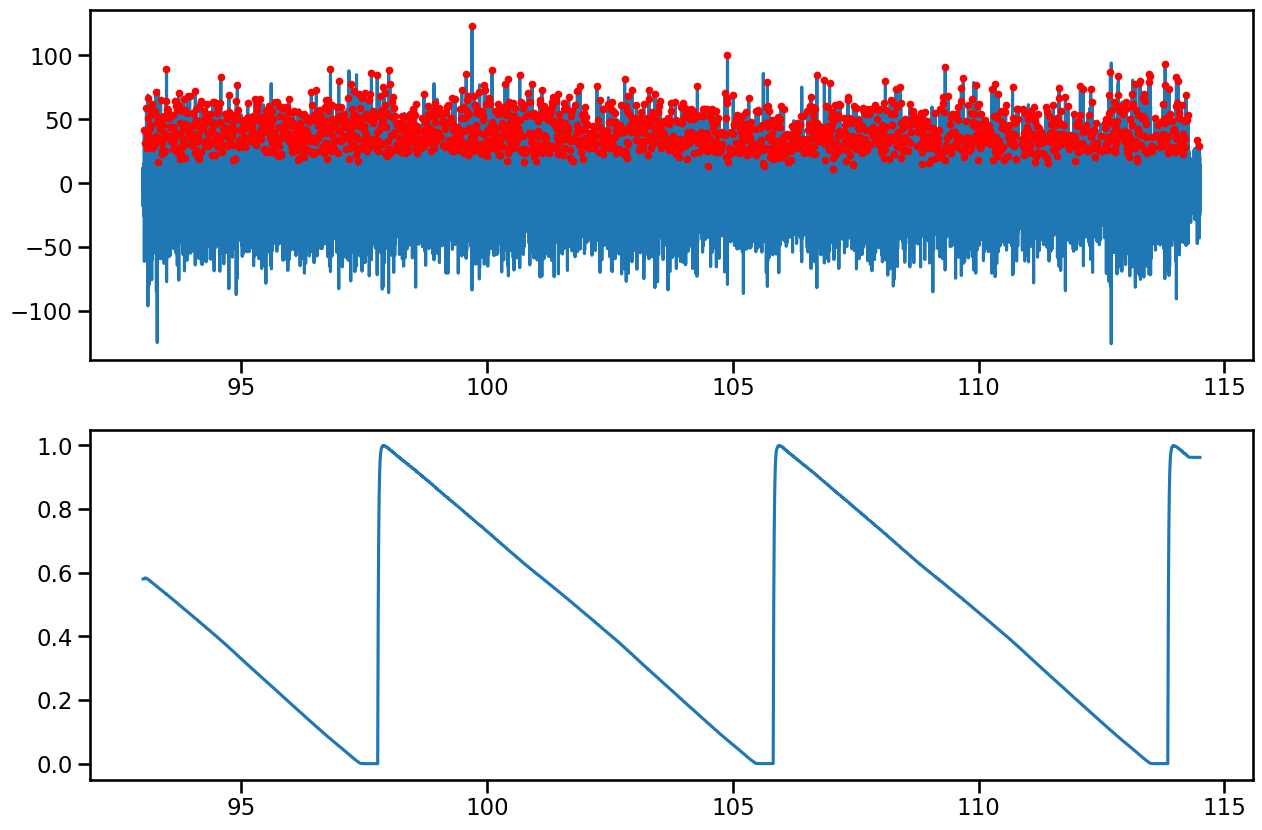

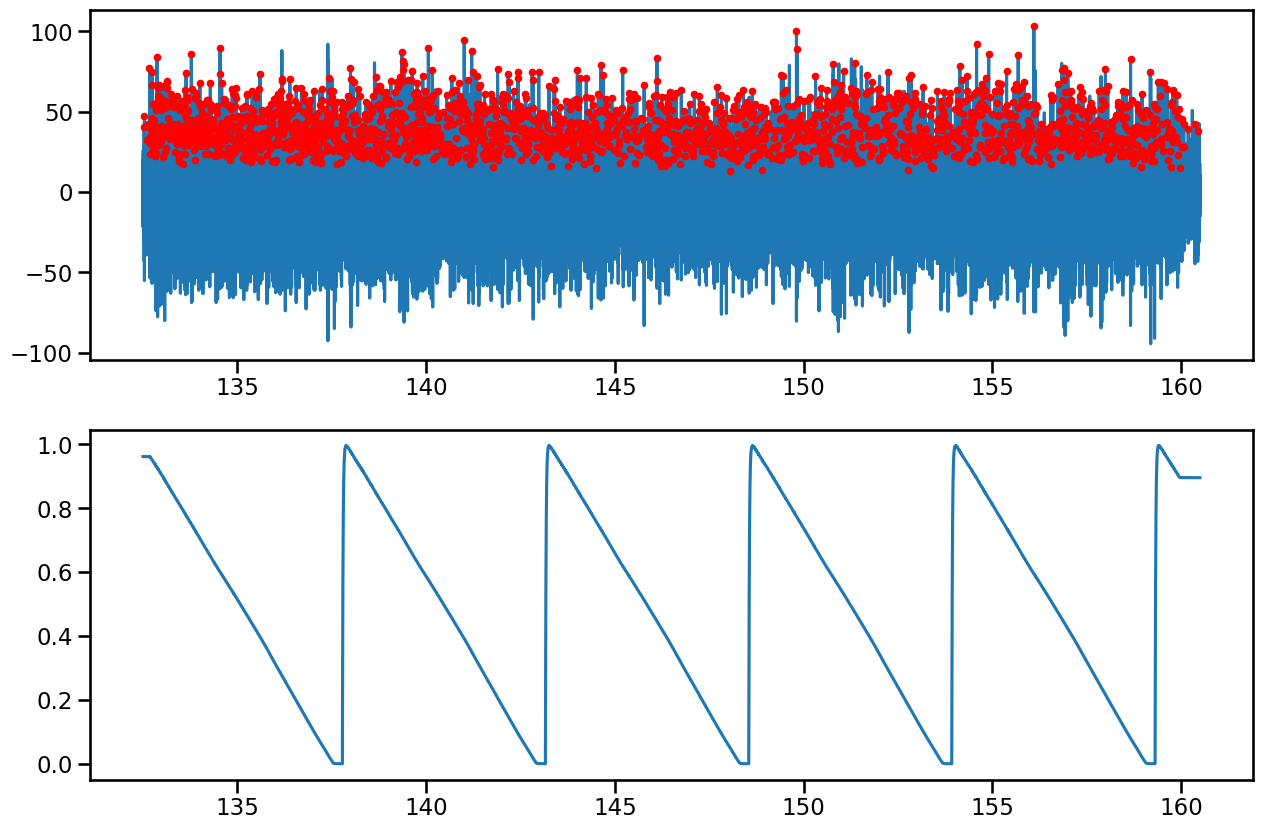

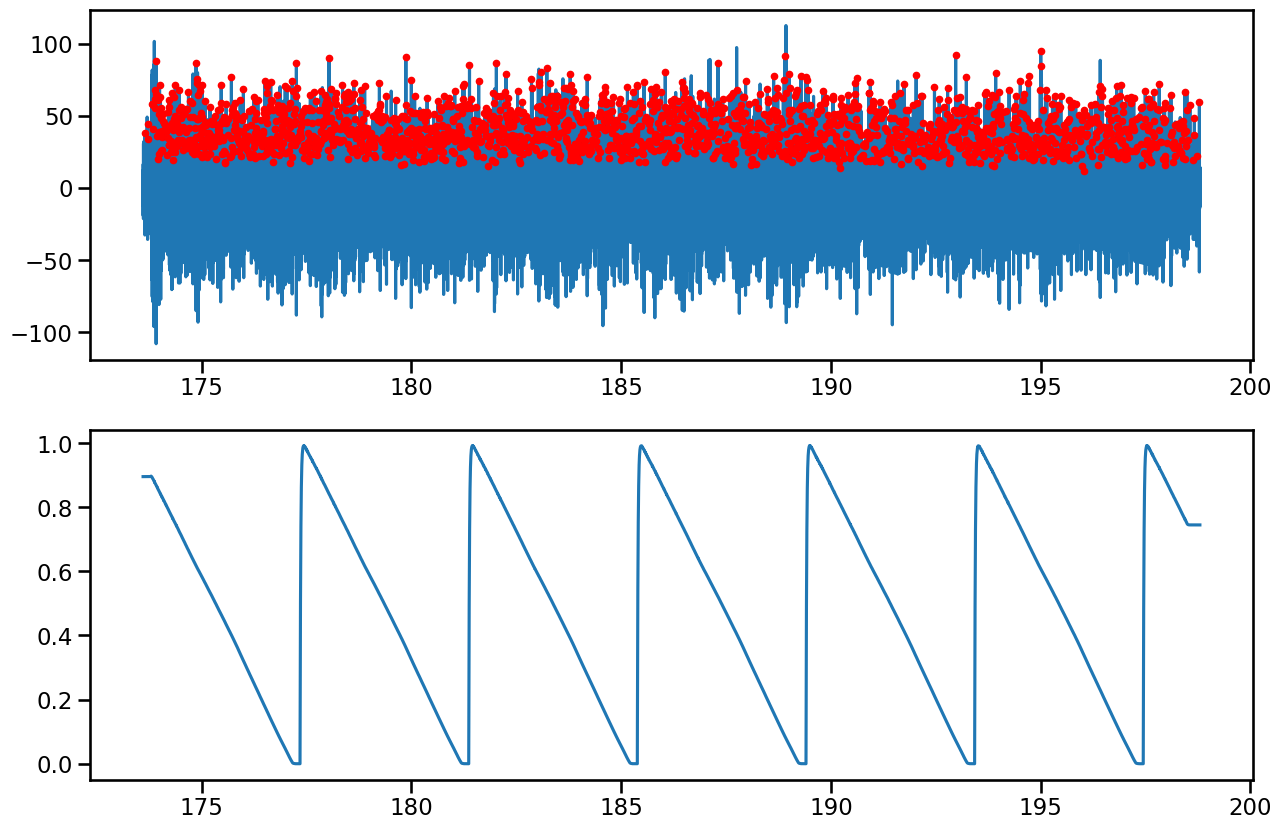

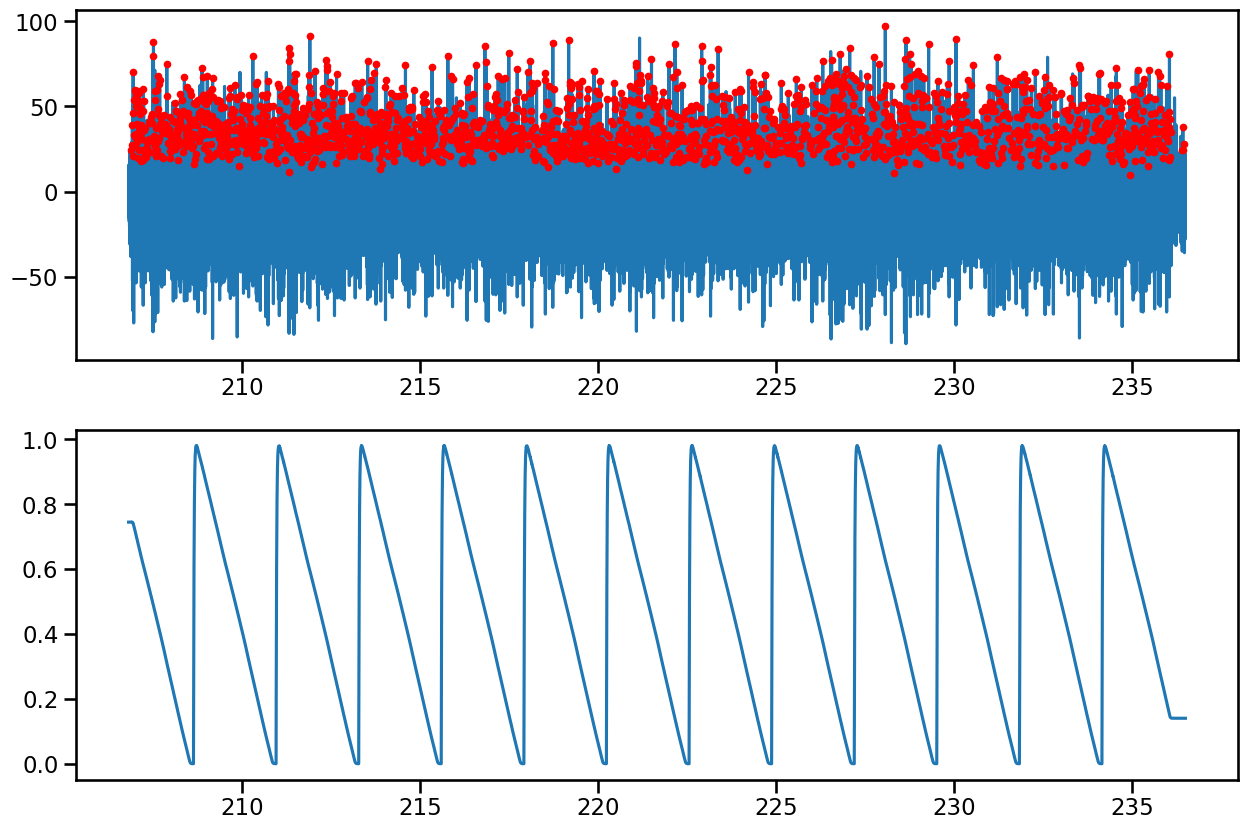

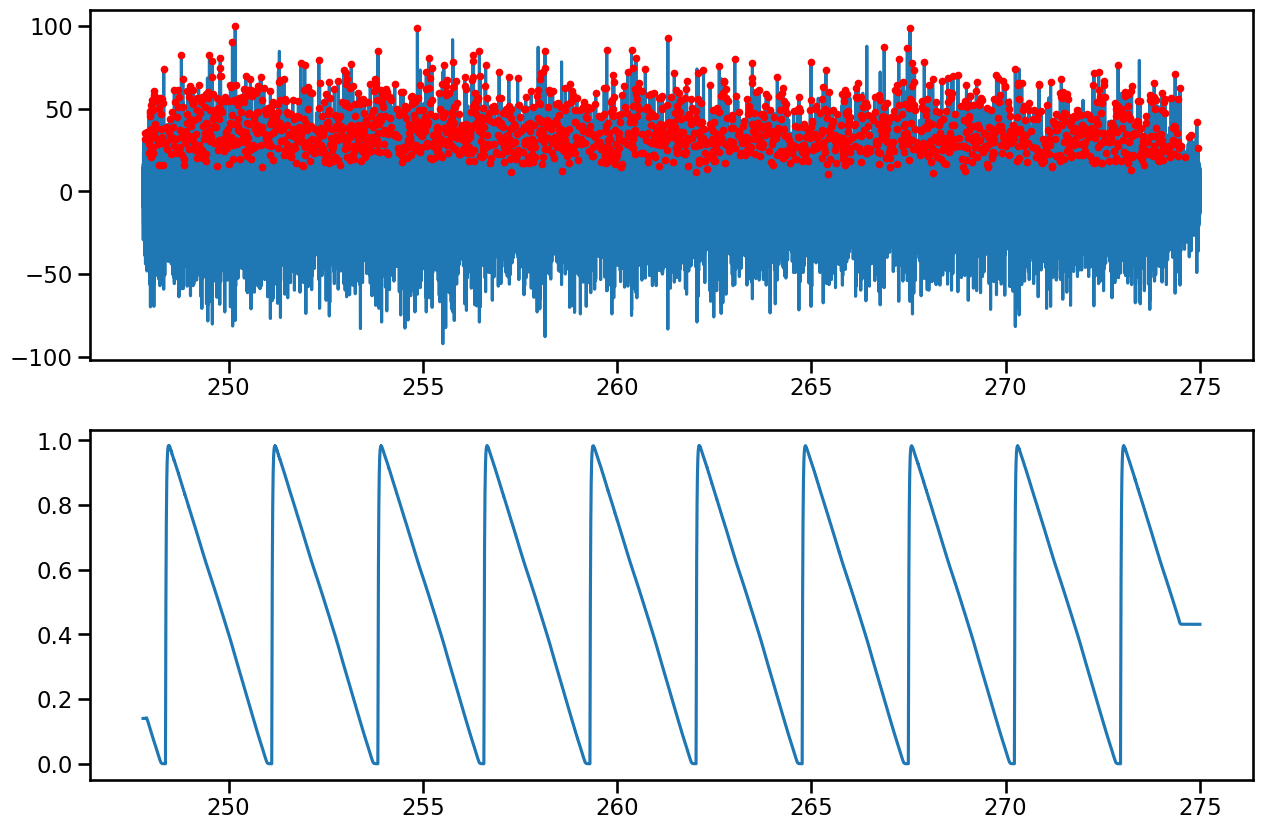

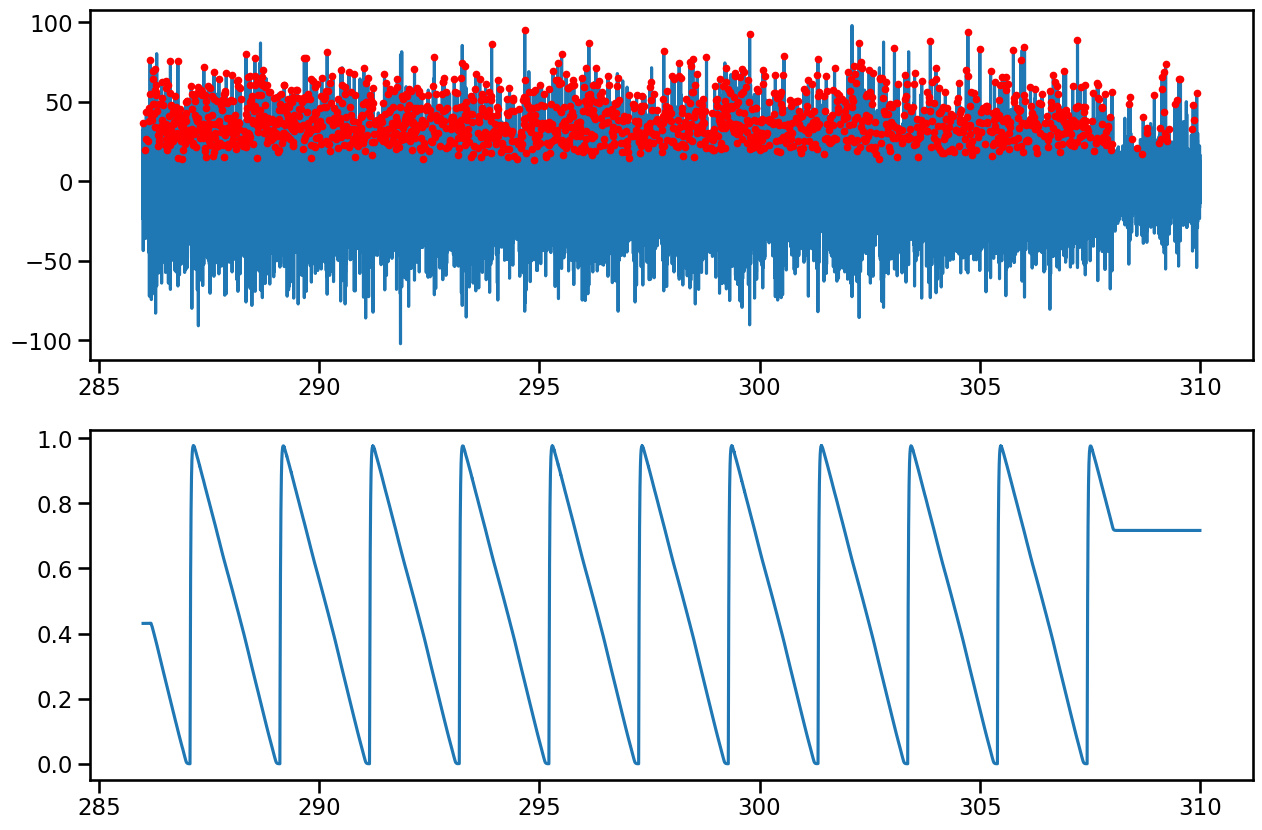

In [16]:
for i = 1 : length(s["trl"])
    figure()
    subplot(2,1,1) ; plot(s["trl"][i]["t"], s["trl"][i]["spk"])
    plot(s["trl"][i]["t"][s["trl"][i]["spkidx"]], s["trl"][i]["peak"], "r.")
    
    subplot(2,1,2)
    plot(s["trl"][i]["t"], s["trl"][i]["stim"])
end

In [25]:
SIZE_MS = 200
window = ones(SIZE_MS * pts_per_ms)
s = compute_trl_frs(s, window)

Dict{Any,Any} with 1 entry:
  "trl" => Dict{Any,Any}(7=>Dict{Any,Any}("stim"=>Float32[0.140161, 0.140161, 0…

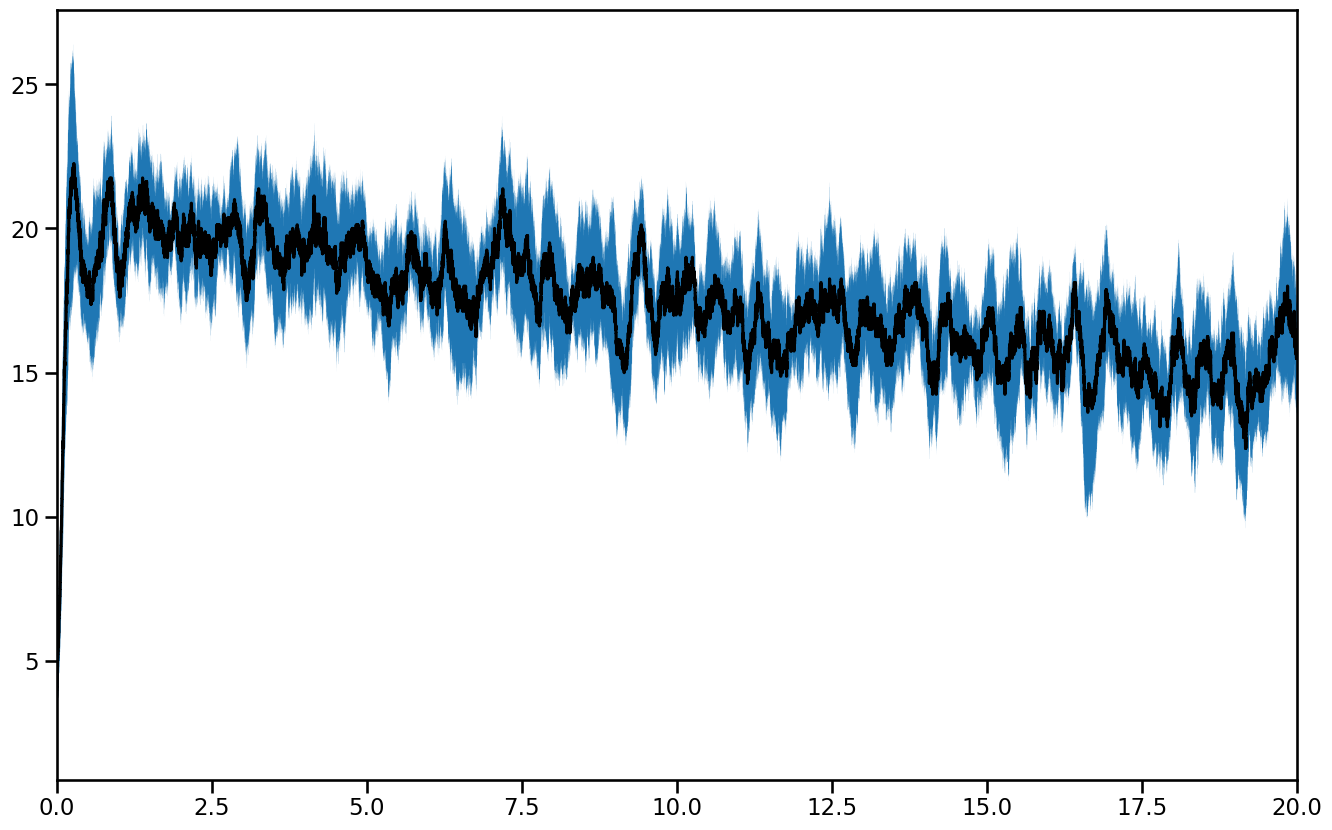

(0, 20)

In [26]:
lengths = []
for i = 1 : length(s["trl"])
    push!(lengths, length(s["trl"][i]["ifr"]))
end
minlength = minimum(lengths)
ifrs = zeros(length(s["trl"]), minlength);
for i = 1 : length(s["trl"])
    ifrs[i,:] = s["trl"][i]["ifr"][1:minlength]
end
s["t_ifr"] = range(0, minlength/pts_per_ms/1000, length=minlength)
s["ifrs"] = transpose(ifrs);
s["ifr"] = transpose(mean(ifrs, dims=1))


ci95 = 1.96 .* std(s["ifrs"], dims=2) ./ sqrt(length(s["trl"]))
plot(s["t_ifr"], s["ifr"], "k")
fill_between(s["t_ifr"], dropdims(s["ifr"]-ci95, dims=2), dropdims(s["ifr"]+ci95, dims=2))
xlim([0, 20])

In [27]:
for i = 1 : length(s["trl"])
    println(length(s["trl"][i]["spkidx"])/ (s["trl"][i]["t"][end] - s["trl"][i]["t"][1]))
end

94.46300715990454
89.05472636815922
93.90697674418605
85.42857142857143
85.39682539682543
74.00673400673396
74.2647058823529
74.125


In [28]:
frs = []
for i = 1 : length(s["trl"])
    push!(frs, length(s["trl"][i]["spkidx"]) / (s["trl"][i]["t"][end] - s["trl"][i]["t"][1]))
end

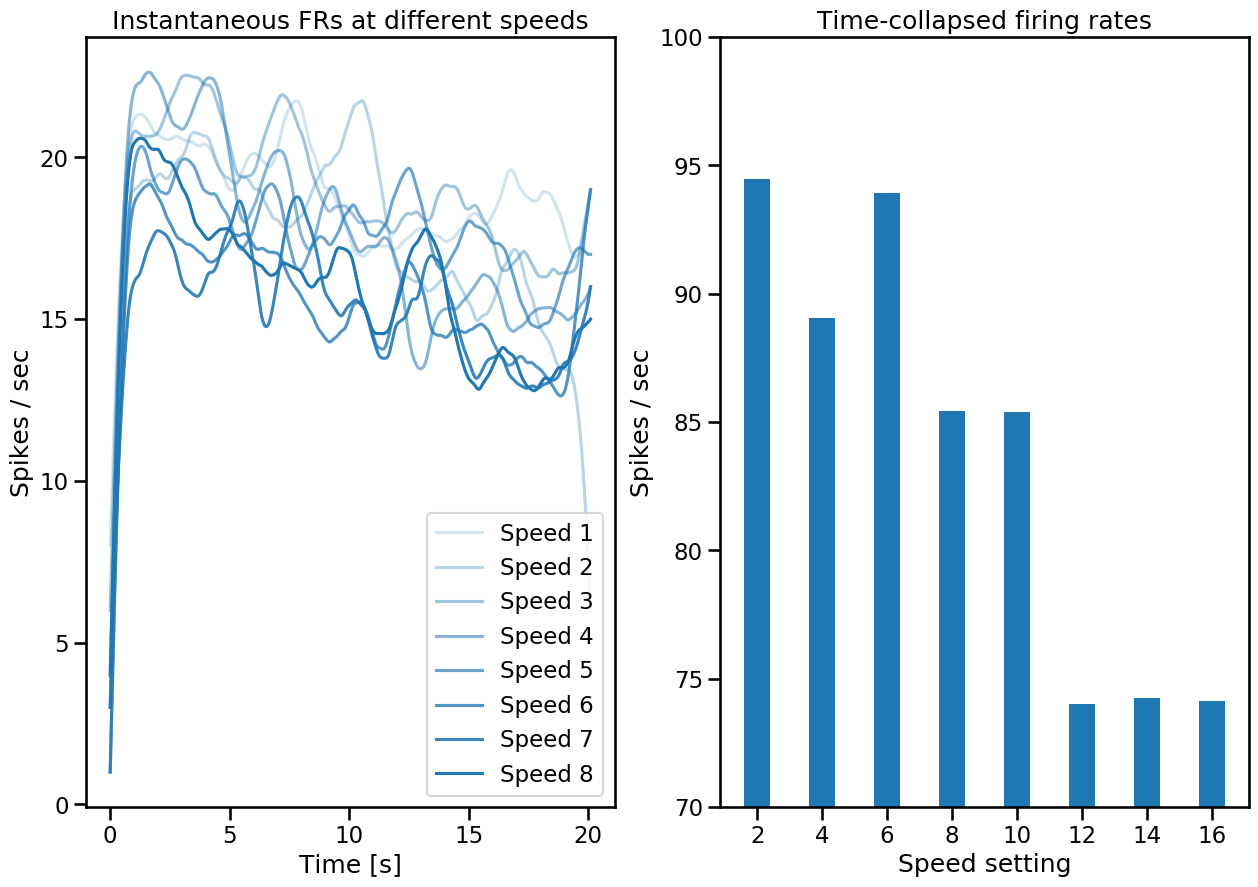

In [29]:
include("spike_utils.jl")
rcParams["figure.figsize"] = (15,10)
figure() ; subplot(1,2,1)
alphas = range(0.2, 1, length=8)
for i = 1 : 8
    plot(s["t_ifr"], smooth(s["ifrs"][:,i], 1000 * pts_per_ms), color="C0", alpha=alphas[i], label="Speed " * string(i))
end
title("Instantaneous FRs at different speeds")
xlabel("Time [s]") ; ylabel("Spikes / sec")
legend(loc="lower right")

subplot(1,2,2);
bar(2:2:16, frs) ; ylim([70, 100])
title("Time-collapsed firing rates")
xticks(2:2:16)
xlabel("Speed setting") ; ylabel("Spikes / sec");
savefig("figs/fig2-varyspeeds.png")

In [30]:
frs = []
for i = 1 : length(s["trl"])
    push!(frs, length(s["trl"][i]["spkidx"]) / (s["trl"][i]["t"][end] - s["trl"][i]["t"][1]))
end